# Importer nødvendige funksjoner 

In [31]:
%matplotlib notebook
import geopandas as gpd
import mplleaflet
import matplotlib.pyplot as plt

_Det viser seg at mplleaflet bruker en gammal versjon av matplotlib, som igjen bruker utdaterte metoder mot ipython kernel. Funker helt greit, men får advarsel. Greit nok for denne demoen sitt formål, men viser at ting utvikles fort, og dine favorittverktøy går fort ut på dato_

## Les bryggeridata

In [8]:
#funksjoner for å fikse opp dataene

#oversett alt annet enn punkt til punkt
def to_point(row):
    if row['geometry'].geom_type == 'Point':
        return row['geometry']
    return row['geometry'].centroid

#set operator-taggen
def fix_operator(row):
    if row['operator'] is None:
        return row['name']
    return row['operator']

In [17]:
# les inn bryggeriene fra en geojson-fil
bryggerier = gpd.read_file('./data/osm_breweries_norway_08032018.geojson')

#fiks opp kolonner
bryggerier['geometry'] = bryggerier.apply(to_point, axis=1)
bryggerier['operator'] = bryggerier.apply(fix_operator, axis=1)

# print( bryggerier.columns)

# velg ut de kolonnene vi faktisk bruker
bryggerier = bryggerier[['name', 'operator', 'amenity', 'wheelchair', 'addr:street', 'geometry']]


In [18]:
bryggerier.columns

Index(['name', 'operator', 'amenity', 'wheelchair', 'addr:street', 'geometry'], dtype='object')

In [21]:
bryggerier = bryggerier.to_crs( { 'init' : 'epsg:32633' } )

In [22]:
bryggerier

,name,operator,amenity,wheelchair,addr:street,geometry
0,Lervig Aktiebryggeri,Lervig Aktiebryggeri,None,None,None,POINT (-31402.31295858347 6570892.770695251)
1,Ringnes Bryggeri,Ringnes Bryggeri,None,None,None,POINT (273131.4992359475 6657509.886092265)
2,Borg Bryggerier,Hansa Borg,None,None,None,POINT (278614.1529118766 6578869.653125005)
3,Haandbryggeriet,Haandbryggeriet,None,None,Jacob Borchs gate,POINT (232103.2269744813 6632335.136763398)
4,E. C. Dahls Bryggeri,Ringnes Bryggeri,None,None,None,POINT (272011.8461559956 7042860.246862236)
5,Christianssand Brygghus,Christianssand Brygghus,pub,None,Tollbodgata,POINT (88003.61937832553 6466239.635657231)
6,Christianssands Bryggeri,Hansa Borg,None,None,None,POINT (87175.71914880152 6466693.891658555)
7,Aass bryggeri,Aass bryggeri,None,None,None,POINT (230965.4520370262 6632340.001561913)
8,Little Brother Brewery,Little Brother Brewery,None,None,None,POINT (262188.2502548404 6650078.410629716)
9,Sagene Bryggeri,Sagene Bryggeri,None,None,Sagveien,POINT (262915.8410362582 6651332.0865315)


<IPython.core.display.Javascript object>


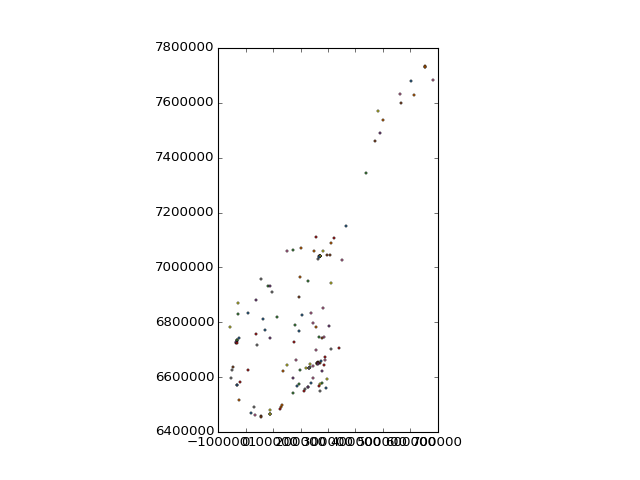

In [23]:
bryggerier.geometry.plot()

In [24]:
sentrum = gpd.read_file( 'data/sentrum2017_web.shp')

In [25]:
bryggerier_isentrum = gpd.sjoin( bryggerier, sentrum, how='inner', op='intersects')

In [35]:
bryggerier_utenomsentrum = bryggerier.iloc[ ~bryggerier.index.isin( bryggerier_isentrum.index)].copy()

In [33]:
def min_distance(fra, til):
    return til.distance(fra).min()

In [36]:
bryggerier_utenomsentrum['avst_sentrum'] = bryggerier_utenomsentrum.geometry.apply( min_distance, args=(sentrum, ) )

In [38]:
bryggerier_utenomsentrum

,name,operator,amenity,wheelchair,addr:street,geometry,avst_sentrum
1,Ringnes Bryggeri,Ringnes Bryggeri,None,None,None,POINT (273131.4992359475 6657509.886092265),896.483869
2,Borg Bryggerier,Hansa Borg,None,None,None,POINT (278614.1529118766 6578869.653125005),485.149975
3,Haandbryggeriet,Haandbryggeriet,None,None,Jacob Borchs gate,POINT (232103.2269744813 6632335.136763398),376.856996
4,E. C. Dahls Bryggeri,Ringnes Bryggeri,None,None,None,POINT (272011.8461559956 7042860.246862236),237.077044
6,Christianssands Bryggeri,Hansa Borg,None,None,None,POINT (87175.71914880152 6466693.891658555),374.147307
10,Ægir Bryggeri,Ægir Bryggeri,None,None,None,POINT (71945.22153987241 6772844.077253991),33441.235670
11,To Tårn Bryggeri,To Tårn Bryggeri,None,None,Osloveien,POINT (269281.0529063782 7041064.142335754),472.013099
12,Finsehytta,Finsehytta,None,None,None,POINT (90225.55664648023 6741407.973044822),28032.489971
13,Inderøy Gårdsbryggeri,Inderøy Gårdsbryggeri,None,None,None,POINT (312667.0446239882 7087870.571849071),14121.508659
14,Ego Brygghus,Ego Brygghus,None,None,Sulfatveien,POINT (272453.7093714521 6573966.452593423),1164.533860


<IPython.core.display.Javascript object>


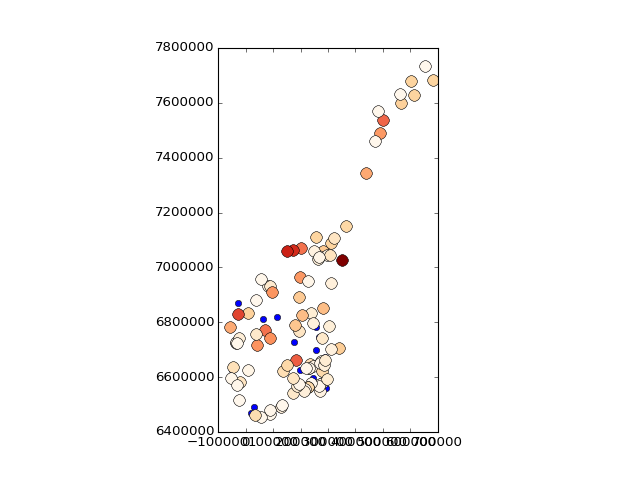

In [39]:
fig2, ax2 = plt.subplots()
ax2.set_aspect('equal')
bryggerier_isentrum.plot( ax=ax2, markersize=6, color='b')
bryggerier_utenomsentrum.plot( ax=ax2, 
                              column='avst_sentrum', 
                              markersize=10, 
                              cmap='OrRd')

In [44]:
mplleaflet.display( fig2, crs= {'init' : 'epsg:32633' }) 

In [45]:
mplleaflet.show( fig2, crs = { 'init' : 'epsg:32633' })

In [46]:
bryggerier_utenomsentrum.avst_sentrum.describe()

count       98.000000
mean      9933.607066
std      12159.282643
min          5.769286
25%        751.042528
50%       4718.407354
75%      14146.988654
max      57094.019264
Name: avst_sentrum, dtype: float64